# Object Detection and Pose detection using YOLO and ultralytics

Concepts and Code snippets courtesy https://www.ultralytics.com/blog

### YOLO

YOLO, which stands for "You Only Look Once," is a state-of-the-art, real-time object detection system. Unlike systems that process an image at the level of individual regions, YOLO looks at the whole image in a single pass, hence the name. It divides the image into a grid, and for each grid cell, it predicts bounding boxes and probabilities for each box. These boxes are then filtered based on the probabilities and a threshold value to give the final object detection output, with each box having a class label assigned to it. This approach allows YOLO to be fast and efficient, suitable for real-time applications.


YOLO is like a super-fast robot that can look at a picture and immediately point out and name all the different things it sees, like cars, dogs, or bicycles. Instead of looking at tiny parts of the picture one by one, it sees the whole picture all at once and quickly figures out what's in it. It's like playing "I spy with my little eye" super quickly!

### Ultralytics 

Ultralytics is a company that specializes in artificial intelligence and machine learning, focusing particularly on vision AI, which involves teaching computers to understand and interpret visual information from the world. They provide advanced AI solutions, offer services related to project development in the field of computer vision, and are known for their work on the YOLO (You Only Look Once) object detection model, which is used widely in various industries for real-time object recognition.


In [ ]:
#pip install ultralytics

### Object Detection

In [ ]:
from ultralytics import YOLO

# load  pretrained model
model = YOLO("yolov8n.pt") 


In [ ]:
# run inference
results = model("person_sitting_back.jpg")
results[0].show()

### Sample output object detections

![object_detect_yolo](object_detect_yolo.png)

### Pose/ Landmark Detection

In [ ]:
from ultralytics import YOLO

# load  pretrained pose model
model = YOLO('yolov8n-pose.pt')  


In [ ]:
# run inference
results = model('person_sitting_back.jpg')  
results[0].show()


### sample output for pose keypoint landmarks

![pose_keypoint_yolo](pose_keypoint_yolo.png)

In [12]:
results[0].names

{0: 'person'}

In [16]:
for class_id, class_name in results[0].names.items():
    print (class_id, class_name)

0 person


In [22]:
results[0].show()

In [5]:
# Access keypoints
keypoints = results[0].keypoints
keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9472, 0.9617, 0.2813, 0.9550, 0.0298, 0.9885, 0.9656, 0.9799, 0.8367, 0.9853, 0.8734, 0.9890, 0.9801, 0.9964, 0.9905, 0.9759, 0.9580]])
data: tensor([[[1.3035e+03, 3.4530e+02, 9.4720e-01],
         [1.3286e+03, 2.9123e+02, 9.6170e-01],
         [0.0000e+00, 0.0000e+00, 2.8135e-01],
         [1.4275e+03, 2.9219e+02, 9.5505e-01],
         [0.0000e+00, 0.0000e+00, 2.9782e-02],
         [1.4980e+03, 5.4256e+02, 9.8849e-01],
         [1.3892e+03, 5.3434e+02, 9.6564e-01],
         [1.3502e+03, 9.8051e+02, 9.7986e-01],
         [1.2609e+03, 9.0426e+02, 8.3669e-01],
         [9.9713e+02, 9.1970e+02, 9.8529e-01],
         [1.0383e+03, 9.0756e+02, 8.7342e-01],
         [1.2836e+03, 1.1343e+03, 9.8904e-01],
         [1.2108e+03, 1.0681e+03, 9.8012e-01],
         [5.7026e+02, 1.0884e+03, 9.9645e-01],
         [5.6194e+02, 1.0339e+03, 9.9047e-01],
         [4.3353e+02, 1.7075e+03, 9.7586e-01],
         [4.6124e+02, 1.643

torch.Size([1, 17, 2])
landmarks tensor([[1303.4564,  345.3005],
        [1328.6471,  291.2347],
        [   0.0000,    0.0000],
        [1427.4789,  292.1924],
        [   0.0000,    0.0000],
        [1497.9740,  542.5648],
        [1389.2424,  534.3439],
        [1350.2078,  980.5083],
        [1260.8981,  904.2570],
        [ 997.1288,  919.7031],
        [1038.2545,  907.5646],
        [1283.6259, 1134.2894],
        [1210.8047, 1068.1077],
        [ 570.2610, 1088.3904],
        [ 561.9359, 1033.8645],
        [ 433.5273, 1707.5066],
        [ 461.2398, 1642.9603]])
torch.Size([17, 2])


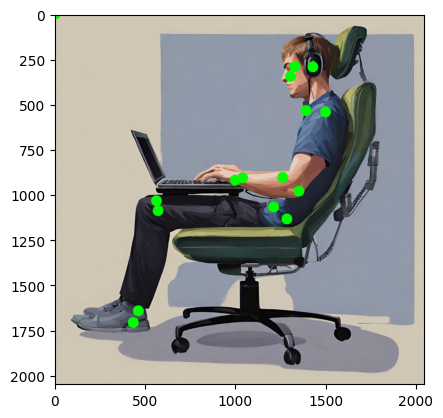

In [6]:
# use OpenCV to plot keypoints
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('person_sitting_back.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print (keypoints.xy.shape)
landmarks = keypoints.xy[0]
print ('landmarks',landmarks)
print (landmarks.shape)
for kpt in landmarks:
    #print ('kpt',kpt)
    #print ('i',i)
    #print ('kpt[0]',kpt[0])
    #print ('kpt[1]',kpt[1])
    x, y = int(kpt[0]), int(kpt[1])
    cv2.circle(image, (x, y), radius=30, color=(0, 255, 0), thickness=-1)

plt.imshow(image)


In [21]:
labels = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder",
          "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist",
          "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

### Find and Plot specific landmarks like shoulder, hip

torch.Size([1, 17, 2])
left_shoulder_index 5
landmarks tensor([1497.9740,  542.5648])
torch.Size([2])
torch.Size([1, 2])
kpt tensor([1497.9740,  542.5648])
i 0
kpt[0] tensor(1497.9740)
kpt[1] tensor(542.5648)
left_hip_index 11
landmarks tensor([1283.6259, 1134.2894])
torch.Size([2])
torch.Size([1, 2])
kpt tensor([1283.6259, 1134.2894])
i 0
kpt[0] tensor(1283.6259)
kpt[1] tensor(1134.2894)


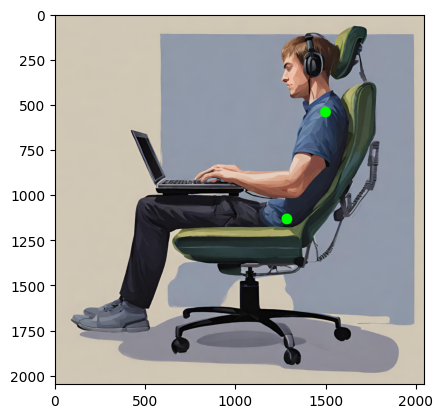

In [33]:
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('person_sitting_back.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print (keypoints.xy.shape)
left_shoulder_index = labels.index('left_shoulder')
print ('left_shoulder_index',left_shoulder_index)

landmarks = (keypoints.xy[0])[left_shoulder_index]
print ('landmarks',landmarks)
print (landmarks.shape)
tensor_2d_row = landmarks.view(1, -1)
print (tensor_2d_row.shape)
#print (landmarks[5])
#stop
for kpt in tensor_2d_row:
    print ('kpt',kpt)
    print ('i',i)
    print ('kpt[0]',kpt[0])
    print ('kpt[1]',kpt[1])
    x, y = int(kpt[0]), int(kpt[1])
    cv2.circle(image, (x, y), radius=30, color=(0, 255, 0), thickness=-1)

left_hip_index = labels.index('left_hip')
print ('left_hip_index',left_hip_index)

landmarks = (keypoints.xy[0])[left_hip_index]
print ('landmarks',landmarks)
print (landmarks.shape)
tensor_2d_row = landmarks.view(1, -1)
print (tensor_2d_row.shape)
#print (landmarks[5])
#stop
for kpt in tensor_2d_row:
    print ('kpt',kpt)
    print ('i',i)
    print ('kpt[0]',kpt[0])
    print ('kpt[1]',kpt[1])
    x, y = int(kpt[0]), int(kpt[1])
    cv2.circle(image, (x, y), radius=30, color=(0, 255, 0), thickness=-1)

plt.imshow(image)

### Object Pose Detection in Video

In [ ]:
# run it from command line as .py
import cv2
from ultralytics import YOLO
import time
# Load pre trained pose model
model = YOLO('yolov8n-pose.pt') 

# Open the video

cap = cv2.VideoCapture("rag_all_scenes.mp4")


#uncomment below to capture live video
#cap = cv2.VideoCapture(0)

# Process each frame
while cap.isOpened():
    time.sleep(10)
    ret, frame = cap.read()
    if not ret:
        break

    # Run model prediction
    # show=true will display all the keypoints as it is 
    #results = model(frame, show=True)
    
    # set it to false to do any post processing like adding text annoations as below
    # and then show the cv2 frame
    results = model(frame, show=False)

    keypoints = results[0].keypoints
    print('key',keypoints)
    left_shoulder_index = 5
    shoulder_landmarks = (keypoints.xy[0])[left_shoulder_index]
    print ('landmarks',shoulder_landmarks)
    left_ankle_index = 15
    ankle_landmarks = (keypoints.xy[0])[left_ankle_index]
    print ('landmarks',ankle_landmarks)

    # Example: Count people and add text annotation
    people_count = sum(1 for class_id, class_name in results[0].names.items() if class_id == 0)
    print ('people_count',people_count)
    text_to_display = f"People Count: {people_count}"
    print ('text_to_display',text_to_display)
    cv2.putText(frame, text_to_display, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 2)
    if shoulder_landmarks[0] !=0:
        ld_text = "shoulder detected"
    else:
        ld_text = ""
    if ankle_landmarks[0] == 0:
        ad_text = "ankle not detected"
    else:
        ad_text=""

    cv2.putText(frame, ld_text, (250, 250), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 2)
    cv2.putText(frame, ad_text, (350, 350), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 2)

    # Show the frame
    cv2.imshow('Frame', frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 81.2ms
Speed: 5.6ms preprocess, 81.2ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 47.6ms
Speed: 3.0ms preprocess, 47.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 71.7ms
Speed: 2.4ms preprocess, 71.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 48.1ms
Speed: 2.6ms preprocess, 48.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 54.9ms
Speed: 2.3ms preprocess, 54.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 58.8ms
Speed: 6.3ms preprocess, 58.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 62.7ms
Speed: 3.1ms preprocess, 62.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 64.5ms
Speed: 3.8ms preprocess, 64.5ms inference, 0.4ms postprocess per image at shape (1, 3, 38

### Sample output using text annotations 

![pose_screencapture_yolo_ultra](pose_screencapture_yolo_ultra.png)

### Sample output displaying keypoints results as it is

![pose_screencapture_keypoints](pose_screencapture_keypoints.png)